Linear, quadratic and cubic regression analysis on Cp for solid HB using given temp(K) and Cp(cal/(mol ⋅ K)) data. 

<class 'numpy.ndarray'>
[8.13857992 0.02161088]
<class 'numpy.ndarray'>
[ 1.44381764e+01 -6.43514282e-02  2.87721215e-04]
<class 'numpy.ndarray'>
[-4.71039797e+00  3.27355211e-01 -2.35597551e-03  5.88711425e-06]


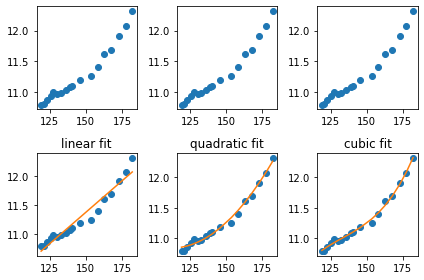

In [1]:
import numpy as np
from scipy.optimize import curve_fit                   
import matplotlib.pyplot as plt
import math

x = np.array([118.99,120.76,122.71,125.48,127.31,130.06,132.41,135.89,139.02,140.25,145.61,153.45,158.03,162.72,167.67,172.86,177.52,182.09])
y = np.array([10.79,10.8,10.86,10.93,10.99,10.96,10.98,11.03,11.08,11.1,11.19,11.25,11.4,11.61,11.69,11.91,12.07,12.32])

def linear_Cp(x, a, b):
    n = x.size
    Cp = np.zeros(n)
    for i in range(n):
        Cp[i] = a + x[i] * b
    return Cp

params = [10, 10]

fit_linear,_ = curve_fit(linear_Cp, x, y, p0=params)

print(type(fit_linear))
print(fit_linear)

yfit_linear = linear_Cp(x, fit_linear[0], fit_linear[1])


def quadratic_Cp(x, a, b, c):
    n = x.size
    Cp = np.zeros(n)
    for i in range(n):
        Cp[i] = a + x[i] * b + c * x[i]**2
    return Cp

params = [10, 10, 10]

fit_quadratic,_ = curve_fit(quadratic_Cp, x, y, p0=params)

print(type(fit_quadratic))
print(fit_quadratic)

yfit_quadratic = quadratic_Cp(x, fit_quadratic[0], fit_quadratic[1], fit_quadratic[2])


def cubic_Cp(x, a, b, c, d):
    n = x.size
    Cp = np.zeros(n)
    for i in range(n):
        Cp[i] = a + x[i] * b + c * x[i]**2 + d * x[i]**3
    return Cp

params = [10, 10, 10, 10]

fit_cubic,_ = curve_fit(cubic_Cp, x, y, p0=params)

print(type(fit_cubic))
print(fit_cubic)

yfit_cubic = cubic_Cp(x, fit_cubic[0], fit_cubic[1], fit_cubic[2], fit_cubic[3])


fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(x,y,'o')
axs[1, 0].plot(x,y,'o',x,yfit_linear)
axs[1, 0].set_title("linear fit")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(x,y,'o')
axs[1, 1].plot(x,y,'o',x,yfit_quadratic)
axs[1, 1].set_title("quadratic fit")
axs[0, 2].plot(x,y,'o')
axs[1, 2].plot(x,y,'o',x,yfit_cubic)
axs[1, 2].set_title("cubic fit")
fig.tight_layout()